<a id="4"></a>
## Tema_04. Protocolo de teleportación cuántica

Alicia quiere enviar información cuántica a Bob. Específicamente, supongamos que quiere enviar un estado cuántico, un qubit: $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$. Esto implica transmitir información sobre $\alpha$ y $\beta$ a Bob.

Existe un teorema en la mecánica cuántica que establece que no es posible simplemente hacer una copia exacta de un estado cuántico desconocido. Esto se conoce como el [teorema de la no clonación](https://en.wikipedia.org/wiki/No-cloning_theorem). Como resultado de esto, podemos ver que Alicia no puede simplemente generar una copia de $\ket{\psi}$ y dársela a Bob. Solo podemos copiar estados clásicos (no superposiciones).

Sin embargo, al aprovechar dos bits clásicos y un par de qubits entrelazados, Alicia puede transferir su estado $\ket{\psi}$ a Bob. A esto se le conoce como teleportación porque, al final, Bob tendrá a $\ket{\psi}$ y Alicia ya no.

$$$$

Para transferir un estado cuántico, Alicia y Bob deben tener ayuda de un tercero, llamémoslo Carlos, que se encargue de enviarles un par de qubits entrelazados. Luego, Alicia realiza algunas operaciones en su qubit, envía los resultados a Bob a través de un *canal de comunicación clásico*, y Bob luego realiza algunas operaciones en su extremo para recibir el qubit de Alicia.

Entonces, Alicia tendrá dos qubits, en uno estará el estado que desea enviarle a Bob, el otro lo utilizará para mantener un estado entrelazado con el único qubit de Bob.

Veamos los pasos a seguir:

### Paso 1

Todo comienza con la necesidad de enviar un estado cuántico aleatorio, en particular un qubit, es decir, escrito de la forma:

$$\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$$

Quien lo envía, Alicia, no conoce dicho estado a ser enviado.

Creamos los qubits necesarios para llevar a cabo este protocolo:

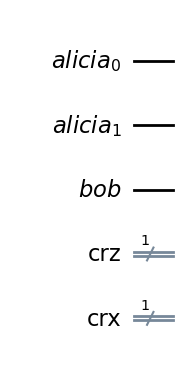

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr_alicia = QuantumRegister(2, name="alicia")  # dos qubits de Alicia
qr_bob = QuantumRegister(1, name="bob")        # un qubit de Bob
crz = ClassicalRegister(1, name="crz")         # 2 bits clasicos
crx = ClassicalRegister(1, name="crx")         # en 2 diferentes registros

circuito_teleportacion = QuantumCircuit(qr_alicia, qr_bob, crz, crx)

circuito_teleportacion.draw('mpl')

Su amigo en común, Carlos, se encarga de preparar un estado entrelazado entre uno de los qubits de Alicia (el qubit 1) y el qubit de Bob. El estado que prepara es un **estado de Bell**. En el lenguaje de circuitos cuánticos, la forma de crear un *par de Bell* entre dos qubits es primero transferir uno de ellos a la base $X$ ($\ket{+}$ y $\ket{-}$) usando una compuerta de Hadamard, y luego aplicar una compuerta $CNOT$ en el otro qubit controlado por el que está en la base $X$.

El par entrelazado, usando los qubits $\ket{q_2q_1}=\ket{0_b 0_{a_1}}$ queda como,

$$CNOT_{1,2}\big(I\otimes H\big)\ket{0_b 0_{a_1}}=\frac{1}{\sqrt2}\big(\ket{0_b 0_{a_1}}+\ket{1_b 1_{a_1}}\big)=\ket{e}$$

$$
\ket{+} = \frac{\ket{0} + \ket{1}}{\sqrt{2}}
$$

$$
\ket{-} = \frac{\ket{0} - \ket{1}}{\sqrt{2}}
$$

Con esto tendrás tanto la definición directa como la transformación inversa entre la base computacional
$\{\,\lvert 0 \rangle, \lvert 1 \rangle\,\}$ y la base $X$ $\{\,\lvert + \rangle, \lvert - \rangle\,\}$.

In [3]:
def crear_estado_bell(circ, a, b):
    circ.h(a)     # poner el qubit a en el estado |+>
    circ.cx(a, b) # CNOT con control el qubit a y objetivo el qubit b

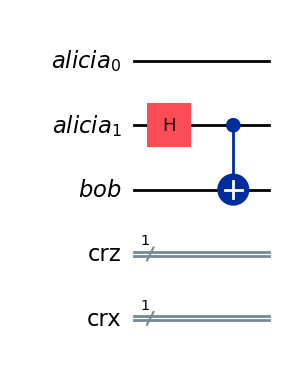

In [4]:
crear_estado_bell(circuito_teleportacion, 1, 2) # circuito, qubit a, qubit b

circuito_teleportacion.draw('mpl')

Después de esto, el estado de 3 qubits, incluyendo el estado a ser enviado $\ket{\psi}$, queda como,

$$\begin{aligned}
\ket{e}\otimes\ket{\psi}&=\frac{1}{\sqrt2}\Big(\big(\ket{00}+\ket{11}\big)\otimes \alpha\ket{0} + \big(\ket{00}+\ket{11}\big)\otimes \beta\ket{1}\Big)\\
&=\frac{1}{\sqrt2}\big(\alpha\ket{000}+\alpha\ket{110}+\beta\ket{001}+\beta\ket{111}\big)
\end{aligned}$$

### Paso 2

Ahora, de acuerdo con el protocolo, Alicia aplica la compuerta $CNOT$ en sus dos qubits, usando de control el qubit a ser enviado $\ket{\psi}$, seguido de una compuerta Hadamard en ese mismo qubit. Esto da como resultado el estado:

$$\begin{aligned}
\Big(I\otimes I\otimes H\Big)\Big(I\otimes CNOT_{0,1}\Big)\Big(\ket{e}\otimes\ket{\psi}\Big)&=\Big(I\otimes I\otimes H\Big)\Big(I\otimes CNOT_{0,1}\Big)\frac{1}{\sqrt2}\Big(\alpha\ket{000}+\alpha\ket{110}+\beta\ket{001}+\beta\ket{111}\Big)\\
&=\Big(I\otimes I\otimes H\Big)\frac{1}{\sqrt2}\Big(\alpha\ket{000}+\alpha\ket{110}+\beta\ket{011}+\beta\ket{101}\Big)\\
&=\frac{1}{2}\Big(\alpha\big(\ket{000}+\ket{001}+\ket{110}+\ket{111}\big)+\beta\big(\ket{010}-\ket{011}+\ket{100}-\ket{101}\big)\Big)
\end{aligned}$$

Que puede ser reescrito como:

$$\begin{aligned}
=\frac{1}{2} \Big( & ~~~~~~\big(\alpha\ket{0}+\beta\ket{1}\big)~~\ket{00}\\
&+ ~\big(\alpha\ket{0}-\beta\ket{1}\big)~~\ket{01}\\
&+ ~\big(\alpha\ket{1}+\beta\ket{0}\big)~~\ket{10}\\
&+ ~\big(\alpha\ket{1}-\beta\ket{0}\big)~~\ket{11}~~~~~\Big)\\
\end{aligned}$$

En código queda como sigue:

In [7]:
def compuertas_alicia(circ, psi, a):
    circ.barrier()
    circ.cx(psi, a)
    circ.h(psi)

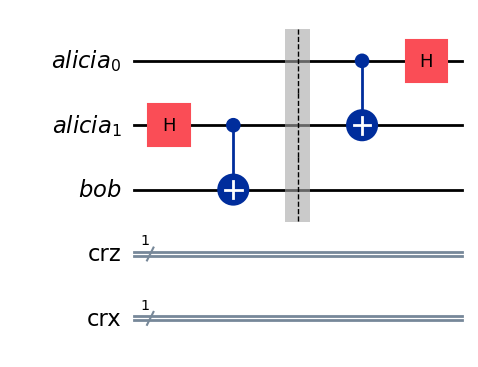

In [8]:
compuertas_alicia(circuito_teleportacion, 0, 1)

circuito_teleportacion.draw('mpl')

### Paso 3

Alicia mide los dos primeros qubits (que son de su propiedad) y los envía como dos bits clásicos a Bob. El resultado que Alicia obtiene es siempre uno de los cuatro estados básicos estándar $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$, con igual probabilidad.

Sobre la base de su medición, el estado de Bob se proyectará a,

$$\ket{00}\rightarrow \big(\alpha\ket{0}+\beta\ket{1}\big)$$
$$\ket{01}\rightarrow \big(\alpha\ket{0}-\beta\ket{1}\big)$$
$$\ket{10}\rightarrow \big(\alpha\ket{1}+\beta\ket{0}\big)$$
$$\ket{11}\rightarrow \big(\alpha\ket{1}-\beta\ket{0}\big)$$

Entonces agregamos las mediciones a los qubits de Alicia:

In [10]:
def mediciones_y_envio(circ, psi, a):
    circ.barrier()
    circ.measure(psi, 0)
    circ.measure(a, 1)

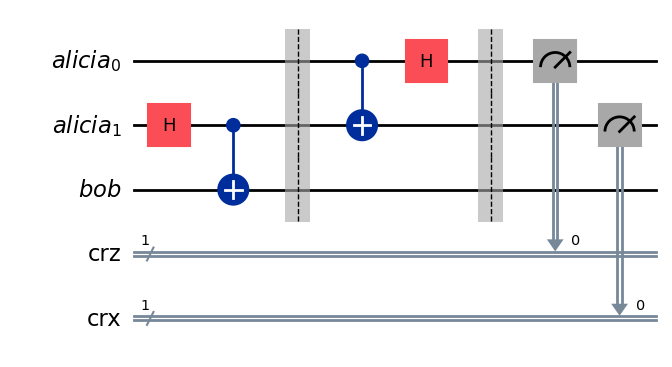

In [11]:
mediciones_y_envio(circuito_teleportacion, 0, 1)

circuito_teleportacion.draw('mpl')

### Paso 4

Bob, al recibir los bits de Alicia, sabe que puede obtener el estado original aplicando las transformaciones apropiadas en su qubit que una vez fue parte del par de Bell entrelazado.

Las transformaciones que necesita aplicar son:

|                Estado de Bob           | Bits recibidos | Compuerta(s) a aplicar |
|:--------------------------------------:|:------------:|:-------------:|
|$$\big(\alpha\ket{0}+\beta\ket{1}\big)$$|00|$$I$$|
|$$\big(\alpha\ket{0}-\beta\ket{1}\big)$$|01|$$Z$$|
|$$\big(\alpha\ket{1}+\beta\ket{0}\big)$$|10|$$X$$|
|$$\big(\alpha\ket{1}-\beta\ket{0}\big)$$|11|$$ZX$$|

Después de este paso, Bob habrá reconstruido con éxito el estado de Alicia.

**Nota**: Esta transferencia de información es puramente clásica.

In [13]:
def compuertas_bob(circ, b, crz, crx):
    circ.barrier()
    with circ.if_test((crx, 1)):
        circ.z(2)
    with circ.if_test((crz, 1)):
        circ.x(2)

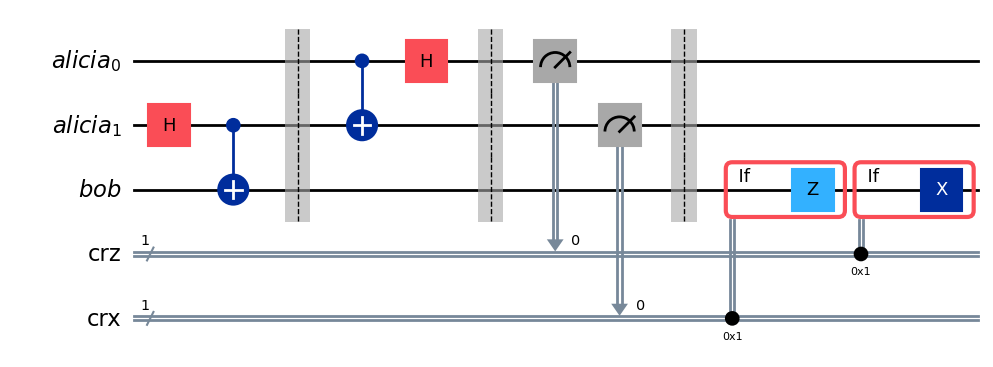

In [14]:
compuertas_bob(circuito_teleportacion, 2, crz, crx)

circuito_teleportacion.draw('mpl')

Al final de este protocolo, el qubit de Alicia ahora se ha teleportado a Bob.

Comprobémoslo ejecutando el protocolo completo y simulándolo:

<IPython.core.display.Latex object>

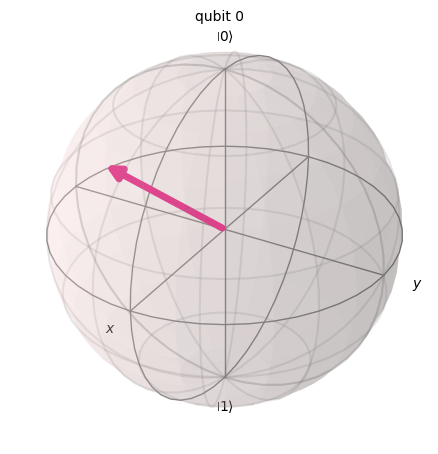

In [16]:
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

# generamos un estado aleatorio (el que enviará Alicia a Bob y al ser aleatorio ella no lo conoce)
psi = random_statevector(2)

# veamos que de que estado se trata
display(psi.draw('latex', prefix="|\\psi\\rangle ="))

plot_bloch_multivector(psi)

In [17]:
from qiskit.circuit.library import Initialize

# crear una instrucción de inicialización que coloque al qubit en el estado que generamos aleatoriamente
instruccion_inicializacion = Initialize(psi)
instruccion_inicializacion.label = "init"

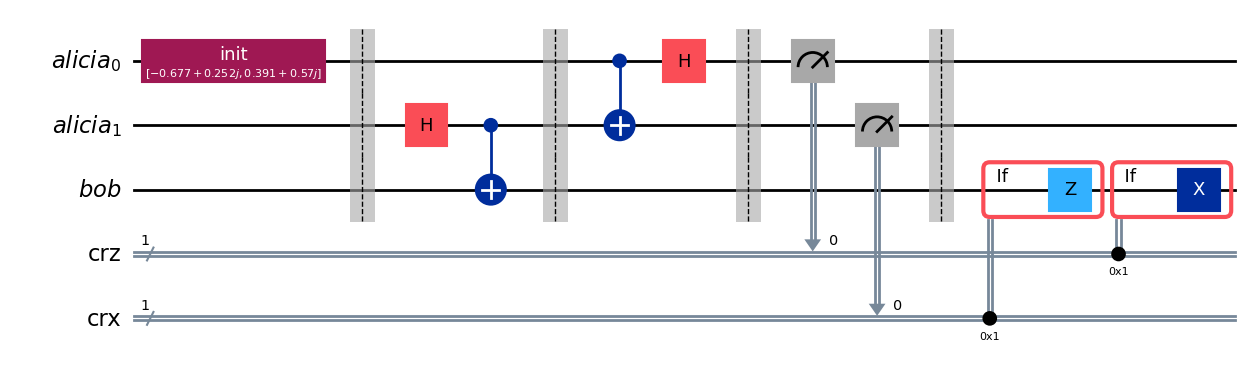

In [18]:
# El protocolo completo:

# Configuración inicial
qr_alicia = QuantumRegister(2, name="alicia")  # dos qubits de Alicia
qr_bob = QuantumRegister(1, name="bob")        # un qubit de Bob
crz = ClassicalRegister(1, name="crz")         # 2 bits clasicos
crx = ClassicalRegister(1, name="crx")         # en 2 diferentes registros
circuito_teleportacion = QuantumCircuit(qr_alicia, qr_bob, crz, crx)

# Paso 0
# Iniciar el qubit a enviar
circuito_teleportacion.append(instruccion_inicializacion, [qr_alicia[0]])
circuito_teleportacion.barrier()

# Paso 1
# Crear el par entrelazado
crear_estado_bell(circuito_teleportacion, qr_alicia[1], qr_bob[0]) # circuito, qubit a, qubit b

# Paso 2
# "Enviar" q1 a Alicia y q2 a Bob
compuertas_alicia(circuito_teleportacion, qr_alicia[0], qr_alicia[1])

# Paso 3
# Alicia envia sus bits clásicos a Bob
mediciones_y_envio(circuito_teleportacion, qr_alicia[0], qr_alicia[1])

# Paso 4
# Bob decodifica su qubit
compuertas_bob(circuito_teleportacion, qr_bob[0], crz, crx)

circuito_teleportacion.draw('mpl')